# Drone Flight Data Analysis

Report submission for consideration at ZIPLINE Data Analyst Co-op/Internship Position

VASU KUMAR
TEXAS A&M UNIVERSITY

**Summary**

Understanding of the flight condition, performance, efficiency is a vital part of a company’s strategy. 
Analyzing and studying flight details can help a company to direct the use of right type of product at right location/conditions at right time. 

In this report we would be leveraging Data Analysis techniques to study the flight details, launches, to target the right parts and perform EDA of flight status.

**Data Pre-Processing Steps**

- Converted timestamp to meaningful attributes extracting day, time, date, day of week, week of year, etc.
- Assigning the correct data types to the attributes.
- Computing distance/pos_magnitude, velocity magnitude from the flight details computed for each Flight ID.
- Removed missing value as it consisted of less than 2% of the data hence ensured noise reduction without any possible data loss. 
- Analyzing Outliers
- Imported necessary libraries to process and visualize data 

In [491]:
#Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
from PIL import Image
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
from pandas.plotting import scatter_matrix
%matplotlib inline

In [492]:
#Data Read to data_sum
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
data_sum = pd.read_csv(os.path.expanduser("Zipline_Data/summary_data.csv"))
data_sum.dtypes

flight_id                  int64
air_temperature          float64
battery_serial_number     object
body_serial_number         int64
commit                    object
launch_airspeed          float64
launch_groundspeed       float64
launch_timestamp          object
preflight_voltage        float64
rel_humidity             float64
static_pressure          float64
wind_direction           float64
wind_magnitude           float64
wing_serial_number        object
dtype: object

In [493]:
data_sum.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,NaN,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,NaN,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,NaN,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,NaN,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,NaN,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032


In [494]:
#Missing Values
data_sum.isnull().sum()

flight_id                 0
air_temperature           0
battery_serial_number     0
body_serial_number        0
commit                    0
launch_airspeed           0
launch_groundspeed        0
launch_timestamp          0
preflight_voltage        16
rel_humidity              0
static_pressure           0
wind_direction            0
wind_magnitude            0
wing_serial_number        0
dtype: int64

In [495]:
data_sum['flight_id']=data_sum['flight_id'].astype('category')
data_sum['battery_serial_number']=data_sum['battery_serial_number'].astype('category')
data_sum['body_serial_number']=data_sum['body_serial_number'].astype('category')
data_sum['wing_serial_number']=data_sum['wing_serial_number'].astype('category')
data_sum.dtypes

flight_id                category
air_temperature           float64
battery_serial_number    category
body_serial_number       category
commit                     object
launch_airspeed           float64
launch_groundspeed        float64
launch_timestamp           object
preflight_voltage         float64
rel_humidity              float64
static_pressure           float64
wind_direction            float64
wind_magnitude            float64
wing_serial_number       category
dtype: object

In [496]:
data_sum['launch_timestamp']=pd.to_datetime(data_sum['launch_timestamp']) #Data type change to date-time type

In [497]:
data_sum['launch_year']=data_sum['launch_timestamp'].dt.year
data_sum['launch_month']=data_sum['launch_timestamp'].dt.month
data_sum['launch_day']=data_sum['launch_timestamp'].dt.day

data_sum['launch_weekofyear']=data_sum['launch_timestamp'].dt.weekofyear
data_sum['launch_dayofweek']=data_sum['launch_timestamp'].dt.weekday_name
data_sum['launch_date']=data_sum['launch_timestamp'].dt.date
data_sum['launch_time']=data_sum['launch_timestamp'].dt.time
data_sum['launch_hour']=data_sum['launch_timestamp'].dt.hour
data_sum['launch_minutes']=data_sum['launch_timestamp'].dt.minute

In [498]:
data_sum.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,launch_year,launch_month,launch_day,launch_weekofyear,launch_dayofweek,launch_date,launch_time,launch_hour,launch_minutes
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59,NaN,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054,2018,9,6,36,Thursday,2018-09-06,07:43:59,7,43
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49,NaN,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032,2018,9,6,36,Thursday,2018-09-06,07:51:49,7,51
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37,NaN,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032,2018,9,6,36,Thursday,2018-09-06,09:56:37,9,56
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04,NaN,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056,2018,9,6,36,Thursday,2018-09-06,10:27:04,10,27
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39,NaN,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032,2018,9,6,36,Thursday,2018-09-06,11:09:39,11,9


In [499]:
data_sum.describe(include="all") #Description Statistics

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,launch_year,launch_month,launch_day,launch_weekofyear,launch_dayofweek,launch_date,launch_time,launch_hour,launch_minutes
count,447.0,447.000000,447,4.470000e+02,447,447.000000,447.000000,447,431.000000,447.000000,447.000000,447.000000,447.000000,447,447.0,447.000000,447.000000,447.000000,447,447,447,447.000000,447.000000
unique,447.0,NaN,26,1.500000e+01,4,NaN,NaN,447,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,7,30,444,NaN,NaN
top,17745.0,NaN,15SPJJJ10012034,5.773501e+17,5c504d9a16,NaN,NaN,2018-10-04 11:17:43,NaN,NaN,NaN,NaN,NaN,15SPJJJ09008034,NaN,NaN,NaN,NaN,Thursday,2018-10-03,16:56:58,NaN,NaN
freq,1.0,NaN,31,6.900000e+01,310,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,65,NaN,NaN,NaN,NaN,91,29,2,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-06 07:43:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-05 17:43:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.234679,NaN,NaN,NaN,31.976493,30.112178,NaN,32.145665,56.291622,80456.449107,-45.294524,2.359469,NaN,2018.0,9.241611,13.995526,38.221477,NaN,NaN,NaN,13.230425,28.885906
std,NaN,4.079718,NaN,NaN,NaN,1.759982,0.371296,NaN,0.187159,7.278221,170.113835,63.491695,0.996348,NaN,0.0,0.428539,8.955544,1.363418,NaN,NaN,NaN,3.733639,17.496776
min,NaN,16.500000,NaN,NaN,NaN,28.027149,27.548899,NaN,31.544811,35.500000,80010.138720,-176.134898,0.188798,NaN,2018.0,9.000000,1.000000,36.000000,NaN,NaN,NaN,7.000000,0.000000
25%,NaN,22.037499,NaN,NaN,NaN,30.761058,29.926867,NaN,32.055271,51.200017,80323.793028,-78.527910,1.703303,NaN,2018.0,9.000000,6.000000,37.000000,NaN,NaN,NaN,10.000000,14.000000


In [500]:
#Creation of new columns
data_sum["pos_magnitude"] = np.nan
data_sum["velocity_magnitude"] = np.nan

In [501]:
data_sum['launch_month']=data_sum['launch_month'].astype('category')
data_sum['launch_day']=data_sum['launch_day'].astype('category')
data_sum['launch_weekofyear']=data_sum['launch_weekofyear'].astype('category')
data_sum['launch_hour']=data_sum['launch_hour'].astype('category')

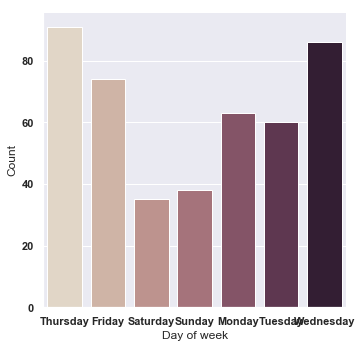

In [502]:
#Visualization of Day of week counts
sns.set(rc={'figure.figsize':(40,40)})
fig=sns.catplot(x="launch_dayofweek", kind="count", palette="ch:.25", data=data_sum)
fig.set_axis_labels('Day of week', 'Count')

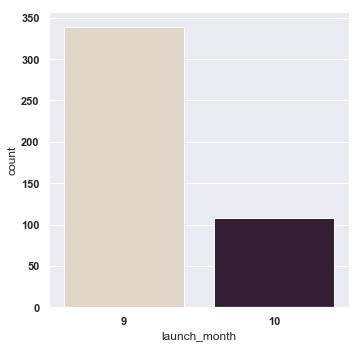

In [503]:
#Analysis of Launch Months
sns.catplot(x="launch_month", kind="count", palette="ch:.25", data=data_sum)

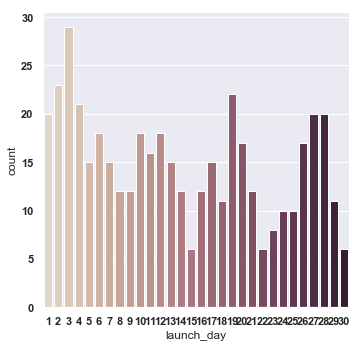

In [504]:
#Analysis of Launch Day (Dates) - More towards start of month
sns.catplot(x="launch_day", kind="count", palette="ch:.25", data=data_sum)

In [505]:
#Function to incorporate distance and velocity from flight sensor details
ID= data_sum['flight_id']

def plot_speed(df):    
    
    for f_number in ID:
        path = "Zipline_Data/flight_" + str(f_number) + ".csv"
        f_data = pd.read_csv(os.path.expanduser(path))

        n_pos = f_data["position_ned_m[0]"].astype(float)
        e_pos = f_data["position_ned_m[1]"].astype(float)
        d_pos = f_data["position_ned_m[2]"].astype(float)
        p_sq = (n_pos**2)+(e_pos**2)+(d_pos**2)
        pos_magnitude = (p_sq**(1/2)).mean()
        
        df.loc[data_sum["flight_id"] == f_number, "pos_magnitude"] = pos_magnitude
        
        
        n_vel = f_data["velocity_ned_mps[0]"].astype(float)
        e_vel = f_data["velocity_ned_mps[1]"].astype(float)
        d_vel = f_data["velocity_ned_mps[2]"].astype(float)
        vel_sq = (n_vel**2)+(e_vel**2)+(d_vel**2)
        vel_magnitude = (vel_sq**(1/2)).mean()
        
        df.loc[data_sum["flight_id"] == f_number, "velocity_magnitude"] = vel_magnitude
    
    return df

In [506]:
#New Data Set
RES = plot_speed(data_sum)
RES.head(10)

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,launch_year,launch_month,launch_day,launch_weekofyear,launch_dayofweek,launch_date,launch_time,launch_hour,launch_minutes,pos_magnitude,velocity_magnitude
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59,NaN,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054,2018,9,6,36,Thursday,2018-09-06,07:43:59,7,43,172.672823,21.859760
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49,NaN,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032,2018,9,6,36,Thursday,2018-09-06,07:51:49,7,51,175.758916,22.258192
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37,NaN,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032,2018,9,6,36,Thursday,2018-09-06,09:56:37,9,56,170.555512,21.342961
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04,NaN,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056,2018,9,6,36,Thursday,2018-09-06,10:27:04,10,27,165.728812,20.922227
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39,NaN,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032,2018,9,6,36,Thursday,2018-09-06,11:09:39,11,9,167.832353,21.360815
5,16959,28.574951,15SPJJJ09018015,577350132840857611,5c504d9a16,33.258007,30.178811,2018-09-06 11:31:07,NaN,65.074951,80621.201026,-68.360838,2.750346,15SPJJJ11024054,2018,9,6,36,Thursday,2018-09-06,11:31:07,11,31,173.162174,22.153258
6,16960,27.550000,15SPJJJ09017016,577209618523082792,5c504d9a16,33.937340,30.063187,2018-09-06 12:55:23,NaN,61.250000,80599.898970,-27.822443,1.556340,15SPJJJ09031032,2018,9,6,36,Thursday,2018-09-06,12:55:23,12,55,169.448839,21.815212
7,16961,28.250000,15SPJJJ10023027,577350132807348254,5c504d9a16,33.598980,29.969515,2018-09-06 13:09:51,NaN,53.500000,80552.491259,7.094333,2.378607,15SPJJJ11049056,2018,9,6,36,Thursday,2018-09-06,13:09:51,13,9,168.641768,21.204245
8,16962,28.600000,15SPJJJ10052026,577350132840857611,5c504d9a16,31.639851,30.263741,2018-09-06 13:43:05,NaN,60.374982,80445.017877,-46.053006,1.161924,15SPJJJ09011032,2018,9,6,36,Thursday,2018-09-06,13:43:05,13,43,177.373540,22.653813
9,16965,32.250000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.744957,30.354775,2018-09-06 14:56:25,NaN,49.600000,80379.646583,-17.594640,2.742027,15SPJJJ11049056,2018,9,6,36,Thursday,2018-09-06,14:56:25,14,56,172.323565,22.063021


<Figure size 1080x720 with 0 Axes>

[Text(0, 0.5, 'Air Temperature (in Celcius)'),
 Text(0.5, 0, 'Average distance (in meteres)')]

Text(0.5, 1.0, 'Air Temperature vs Distance of Flights')

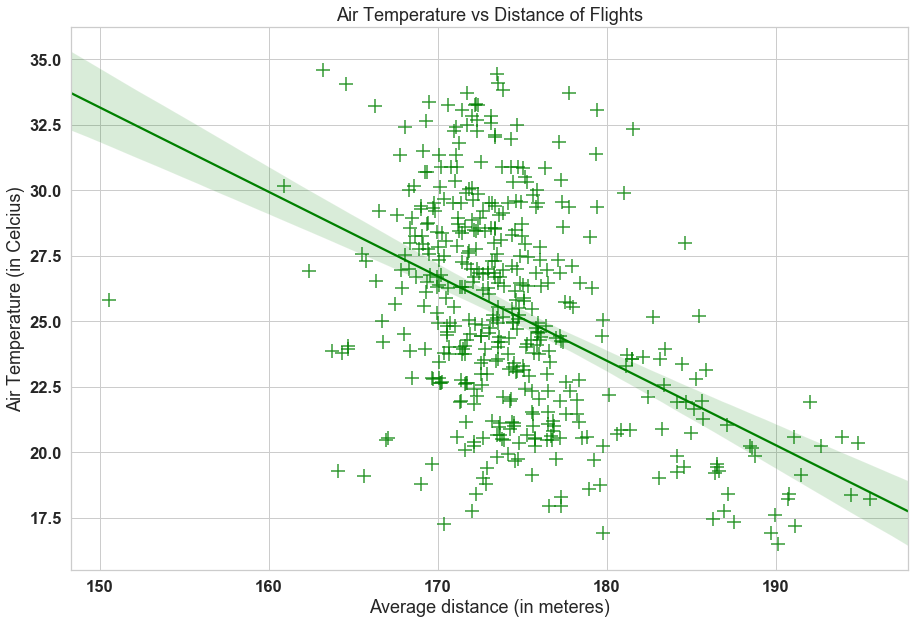

In [508]:
#Scatter Plot to observe Air Temperature vs Distance
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='pos_magnitude', y='air_temperature', data=RES, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Average distance (in meteres)', ylabel='Air Temperature (in Celcius)')
ax.set_title('Air Temperature vs Distance of Flights')

<Figure size 1080x720 with 0 Axes>

[Text(0, 0.5, 'Launch Groundspeed'),
 Text(0.5, 0, 'Average distance (in meteres)')]

Text(0.5, 1.0, 'Launch Groundspeed vs Distance')

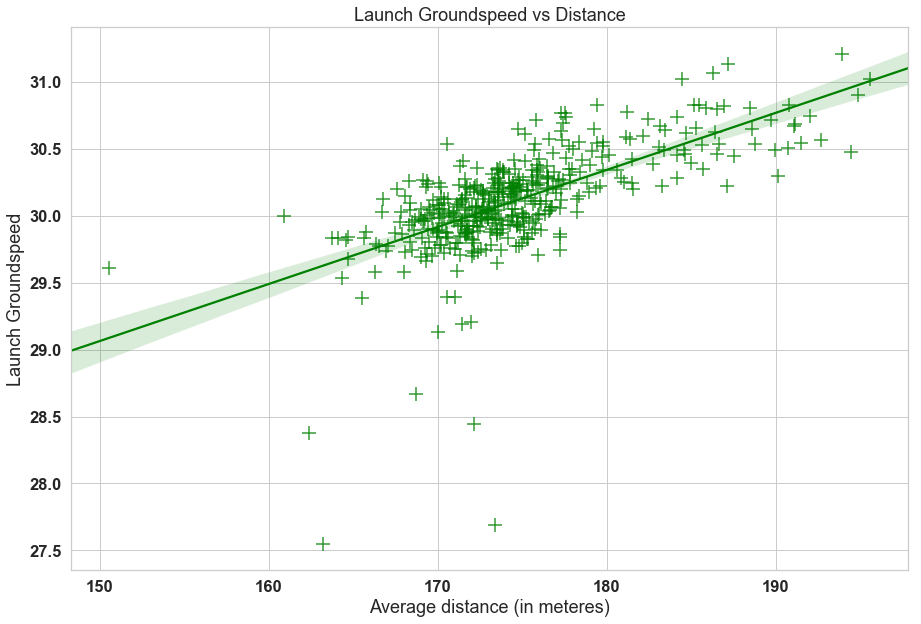

In [509]:
#Scatter Plot to observe LAunch Ground speed vs Distance
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='pos_magnitude', y='launch_groundspeed', data=RES, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Average distance (in meteres)', ylabel='Launch Groundspeed')
ax.set_title('Launch Groundspeed vs Distance')

<Figure size 1080x720 with 0 Axes>

[Text(0, 0.5, 'Launch Airspeed'),
 Text(0.5, 0, 'Average distance (in meteres)')]

Text(0.5, 1.0, 'Launch Air Speed vs Distance')

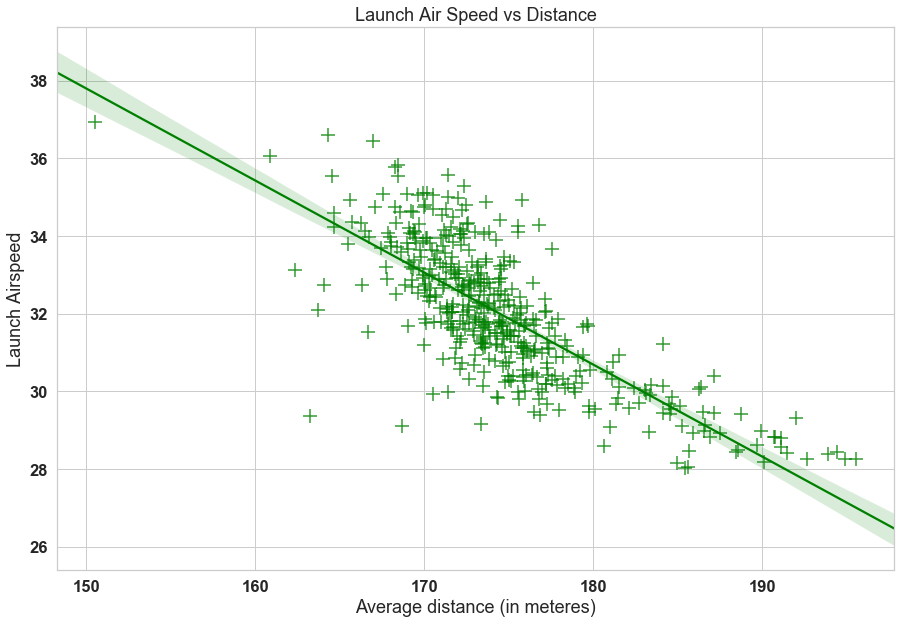

In [510]:
#LAunch Air Speed vs Distance
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='pos_magnitude', y='launch_airspeed', data=RES, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Average distance (in meteres)', ylabel='Launch Airspeed')
ax.set_title('Launch Air Speed vs Distance')

In [343]:
RES.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number,launch_year,launch_month,launch_day,launch_weekofyear,launch_dayofweek,launch_date,launch_time,launch_hour,launch_minutes,pos_magnitude,velocity_magnitude
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59,NaN,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054,2018,9,6,36,Thursday,2018-09-06,07:43:59,7,43,172.672823,21.859760
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49,NaN,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032,2018,9,6,36,Thursday,2018-09-06,07:51:49,7,51,175.758916,22.258192
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37,NaN,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032,2018,9,6,36,Thursday,2018-09-06,09:56:37,9,56,170.555512,21.342961
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04,NaN,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056,2018,9,6,36,Thursday,2018-09-06,10:27:04,10,27,165.728812,20.922227
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39,NaN,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032,2018,9,6,36,Thursday,2018-09-06,11:09:39,11,9,167.832353,21.360815


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C711FA57F0>,
      dtype=object)

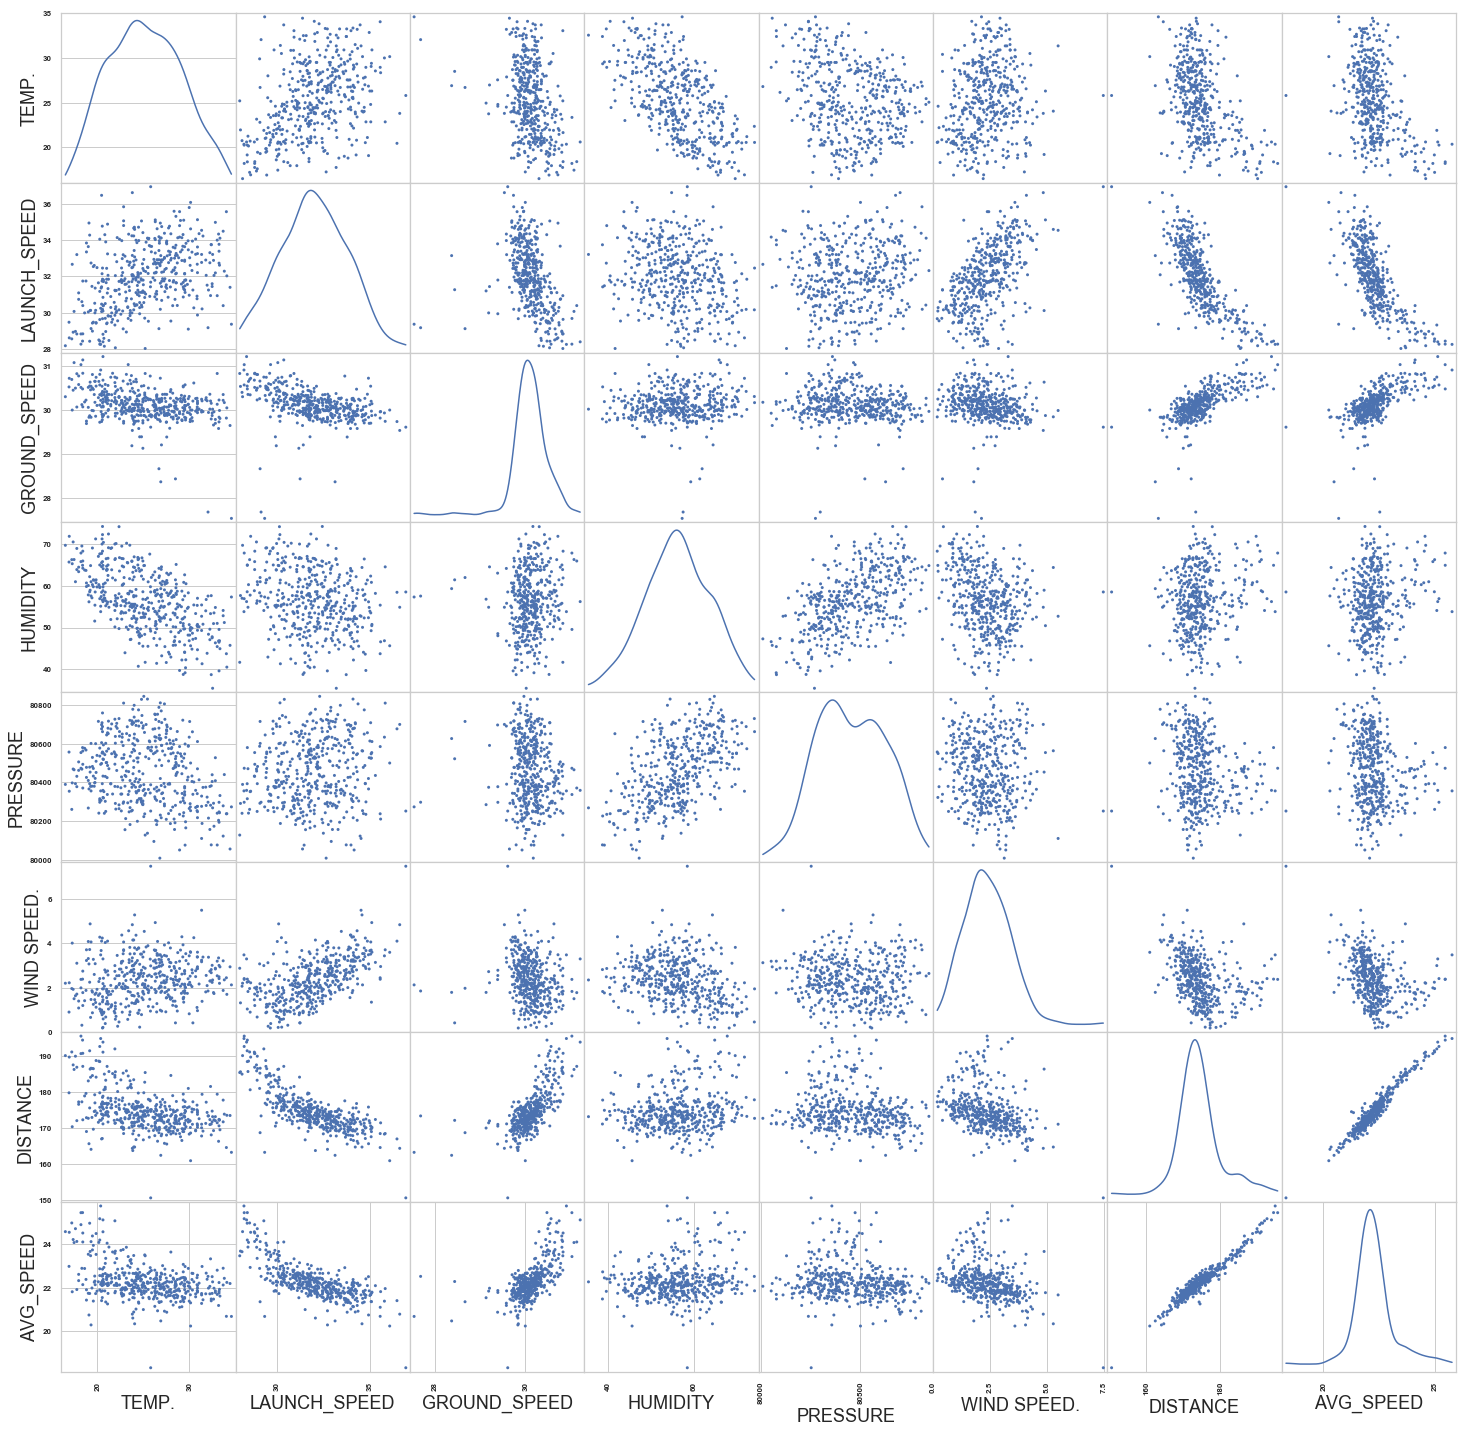

In [511]:
#Understanding Data Distribution
relevant_data = RES.drop(['flight_id','preflight_voltage','launch_timestamp','commit','wind_direction','wing_serial_number','launch_year','launch_month','launch_day','launch_weekofyear','launch_dayofweek','launch_date','launch_time','launch_hour','launch_minutes'], axis=1)
relevant_data.rename(columns={'air_temperature':'TEMP.',
                          'rel_humidity':'HUMIDITY',
                          'static_pressure':'PRESSURE',
                          'wind_magnitude':'WIND SPEED.',
                          'pos_magnitude':'DISTANCE',
                          'velocity_magnitude':'AVG_SPEED', 
                          'launch_groundspeed':'GROUND_SPEED', 
                          'launch_airspeed':'LAUNCH_SPEED'}, inplace=True)

scatter_matrix(relevant_data, alpha=1, figsize=(25, 25), diagonal='kde')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6afc19940>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6afc19dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6afc19518>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6afbfb780>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6afbfbb00>],
 'means': []}

Text(0, 0.5, 'Distance (meters)')

Text(0.5, 0, 'Standard Deviation: 5.72')

Text(0.5, 1.0, 'Box Plot of Distance of Dron Flights')

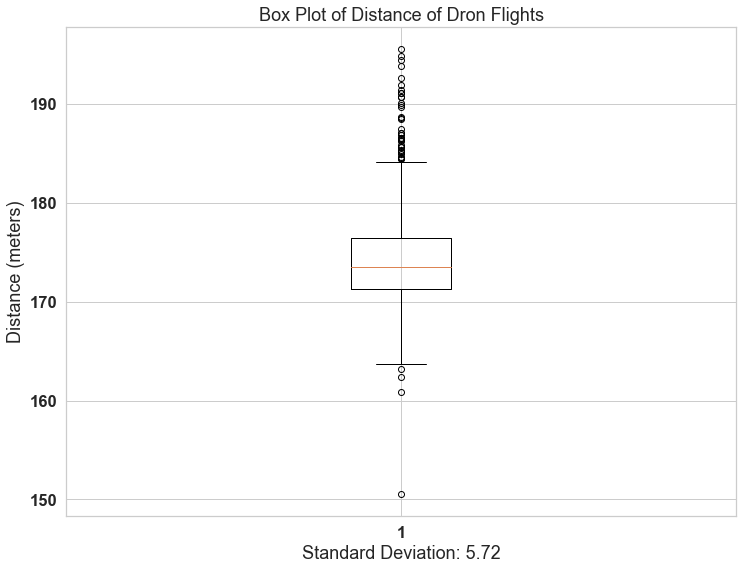

In [514]:
#Box Plot of Distance
fig = plt.figure(figsize=(12, 9))
deviation = RES['pos_magnitude'].values.std(ddof=1)
xlab = "Standard Deviation: " + str(deviation)[0:4]

plt.boxplot(RES['pos_magnitude'])
plt.ylabel("Distance (meters)")
plt.xlabel(xlab)
plt.title("Box Plot of Distance of Dron Flights")

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6b4fc4ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6b4fee630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6b4fc4ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6b4feed30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6b4feee48>],
 'means': []}

Text(0, 0.5, 'Air temp in celcius')

Text(0.5, 0, 'Standard Deviation: 4.07')

Text(0.5, 1.0, 'Outliers Analysis')

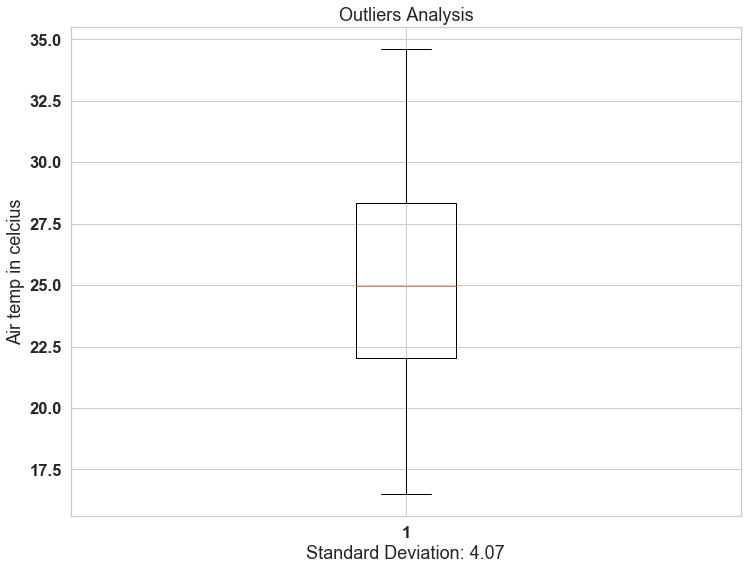

In [515]:
#Air Temperature Distribution
fig = plt.figure(figsize=(12, 9))
deviation = RES['air_temperature'].values.std(ddof=1)
xlab = "Standard Deviation: " + str(deviation)[0:4]

plt.boxplot(RES['air_temperature'])
plt.ylabel("Air temp in celcius")
plt.xlabel(xlab)
plt.title("Outliers Analysis")

In [516]:
optimal_distance=RES['pos_magnitude'].quantile(0.91)
outliers = RES[RES['pos_magnitude'] > optimal_distance]
max_temp = outliers['air_temperature'].max()
min_temp = outliers['air_temperature'].min()
optimal_temp = outliers['air_temperature'].mean()
inrange = RES[RES['pos_magnitude'] <= optimal_distance]
range_max = inrange['air_temperature'].max()
range_min = inrange['air_temperature'].min()
range_average = inrange['air_temperature'].mean()

In [517]:
print("The longest flight distance for",optimal_distance," meters and above.")
print("The flight condition for longest flight distance happens when temperature is between",min_temp,"to",max_temp,"Celcius")

The longest flight distance for 183.4151738792448  meters and above.
The flight condition for longest flight distance happens when temperature is between 16.5 to 28.0 Celcius


In [518]:
print("The flight condition for flight distance less than",optimal_distance,"meters happens when temperature is between",range_min,"to",range_max,"Celsius")

The flight condition for flight distance less than 183.4151738792448 meters happens when temperature is between 16.900000000000002 to 34.6 Celsius


In [519]:
a=RES['pos_magnitude'].quantile(0.008)
inrange = RES[RES['pos_magnitude'] <= a]
r_max = inrange['air_temperature'].max()
r_min = inrange['air_temperature'].min()
r_average = inrange['air_temperature'].mean()

In [520]:
print("The flight condition for flight distance less than",a,"meters happens when temperature is between",r_min,"to",r_max,"Celsius")

The flight condition for flight distance less than 163.4979999109405 meters happens when temperature is between 25.800000000000004 to 34.6 Celsius


In [521]:
optimal_velocity=RES['launch_groundspeed'].quantile(0.91)
outliers1 = RES[RES['launch_groundspeed'] > optimal_velocity]
max_temp1 = outliers['air_temperature'].max()
min_temp1 = outliers['air_temperature'].min()
optimal_temp1 = outliers['air_temperature'].mean()
inrange1 = RES[RES['launch_groundspeed'] <= optimal_velocity]
range_max1 = inrange['air_temperature'].max()
range_min1 = inrange['air_temperature'].min()
range_average1 = inrange['air_temperature'].mean()

In [522]:
print("The highest launch groundspeed is of",optimal_velocity,"and above.")
print("The flight condition for highest flight velocity happens when temperature is between",min_temp1,"to",max_temp1,"Celcius")

The highest launch groundspeed is of 30.566709972340057 and above.
The flight condition for highest flight velocity happens when temperature is between 16.5 to 28.0 Celcius


<Figure size 1800x1800 with 0 Axes>

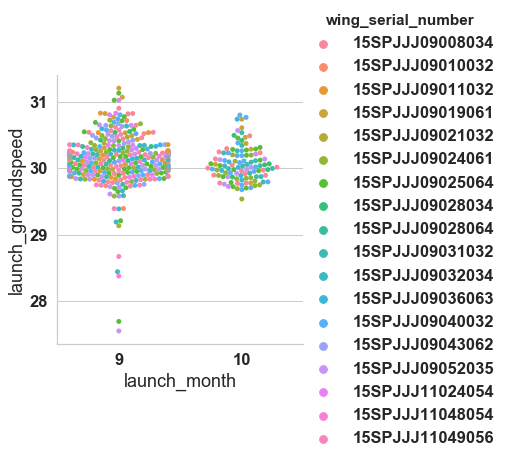

In [523]:
#Distribution of launch month - launch_groundspeed vs Wing Serial Number
fig = plt.figure(figsize=(25, 25))
sns.catplot(x="launch_month", y="launch_groundspeed", hue="wing_serial_number", kind="swarm", data=data_sum);

<Figure size 1800x1800 with 0 Axes>

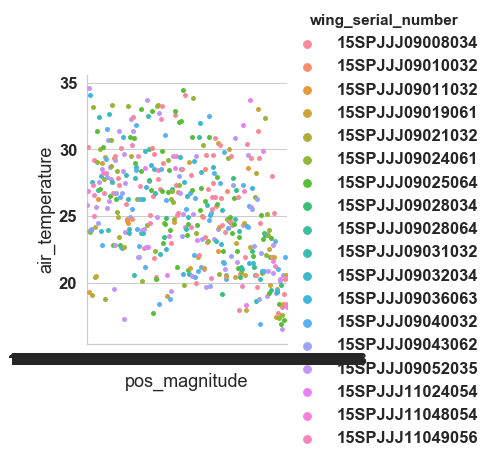

In [524]:
#Plot of launch Air Temperature - Distance vs Wing Serial Number
fig = plt.figure(figsize=(25, 25))
sns.catplot(x="pos_magnitude", y="air_temperature", hue="wing_serial_number", kind="swarm",data=data_sum)

In [525]:
#Function to plot variation of plots for Distance and Wing Serial Number
def mean_attribute(type_no,attribute,dataframe):
    a=dataframe.groupby(type_no)[attribute].mean()
    temp=pd.DataFrame(a)
    temp=temp.reset_index()
    temp = temp.sort_values(by=[attribute])
    fig, axes = plt.subplots(3,1)
    fig.set_size_inches(45, 45)
    sns.stripplot(data=data_sum,x="pos_magnitude",y="wing_serial_number",ax=axes[0],jitter=True)
    sns.boxplot(data=data_sum,y="pos_magnitude",x="wing_serial_number",orient="v",ax=axes[1])
    sns.barplot(data_sum["pos_magnitude"],data_sum["wing_serial_number"],ax=axes[2])

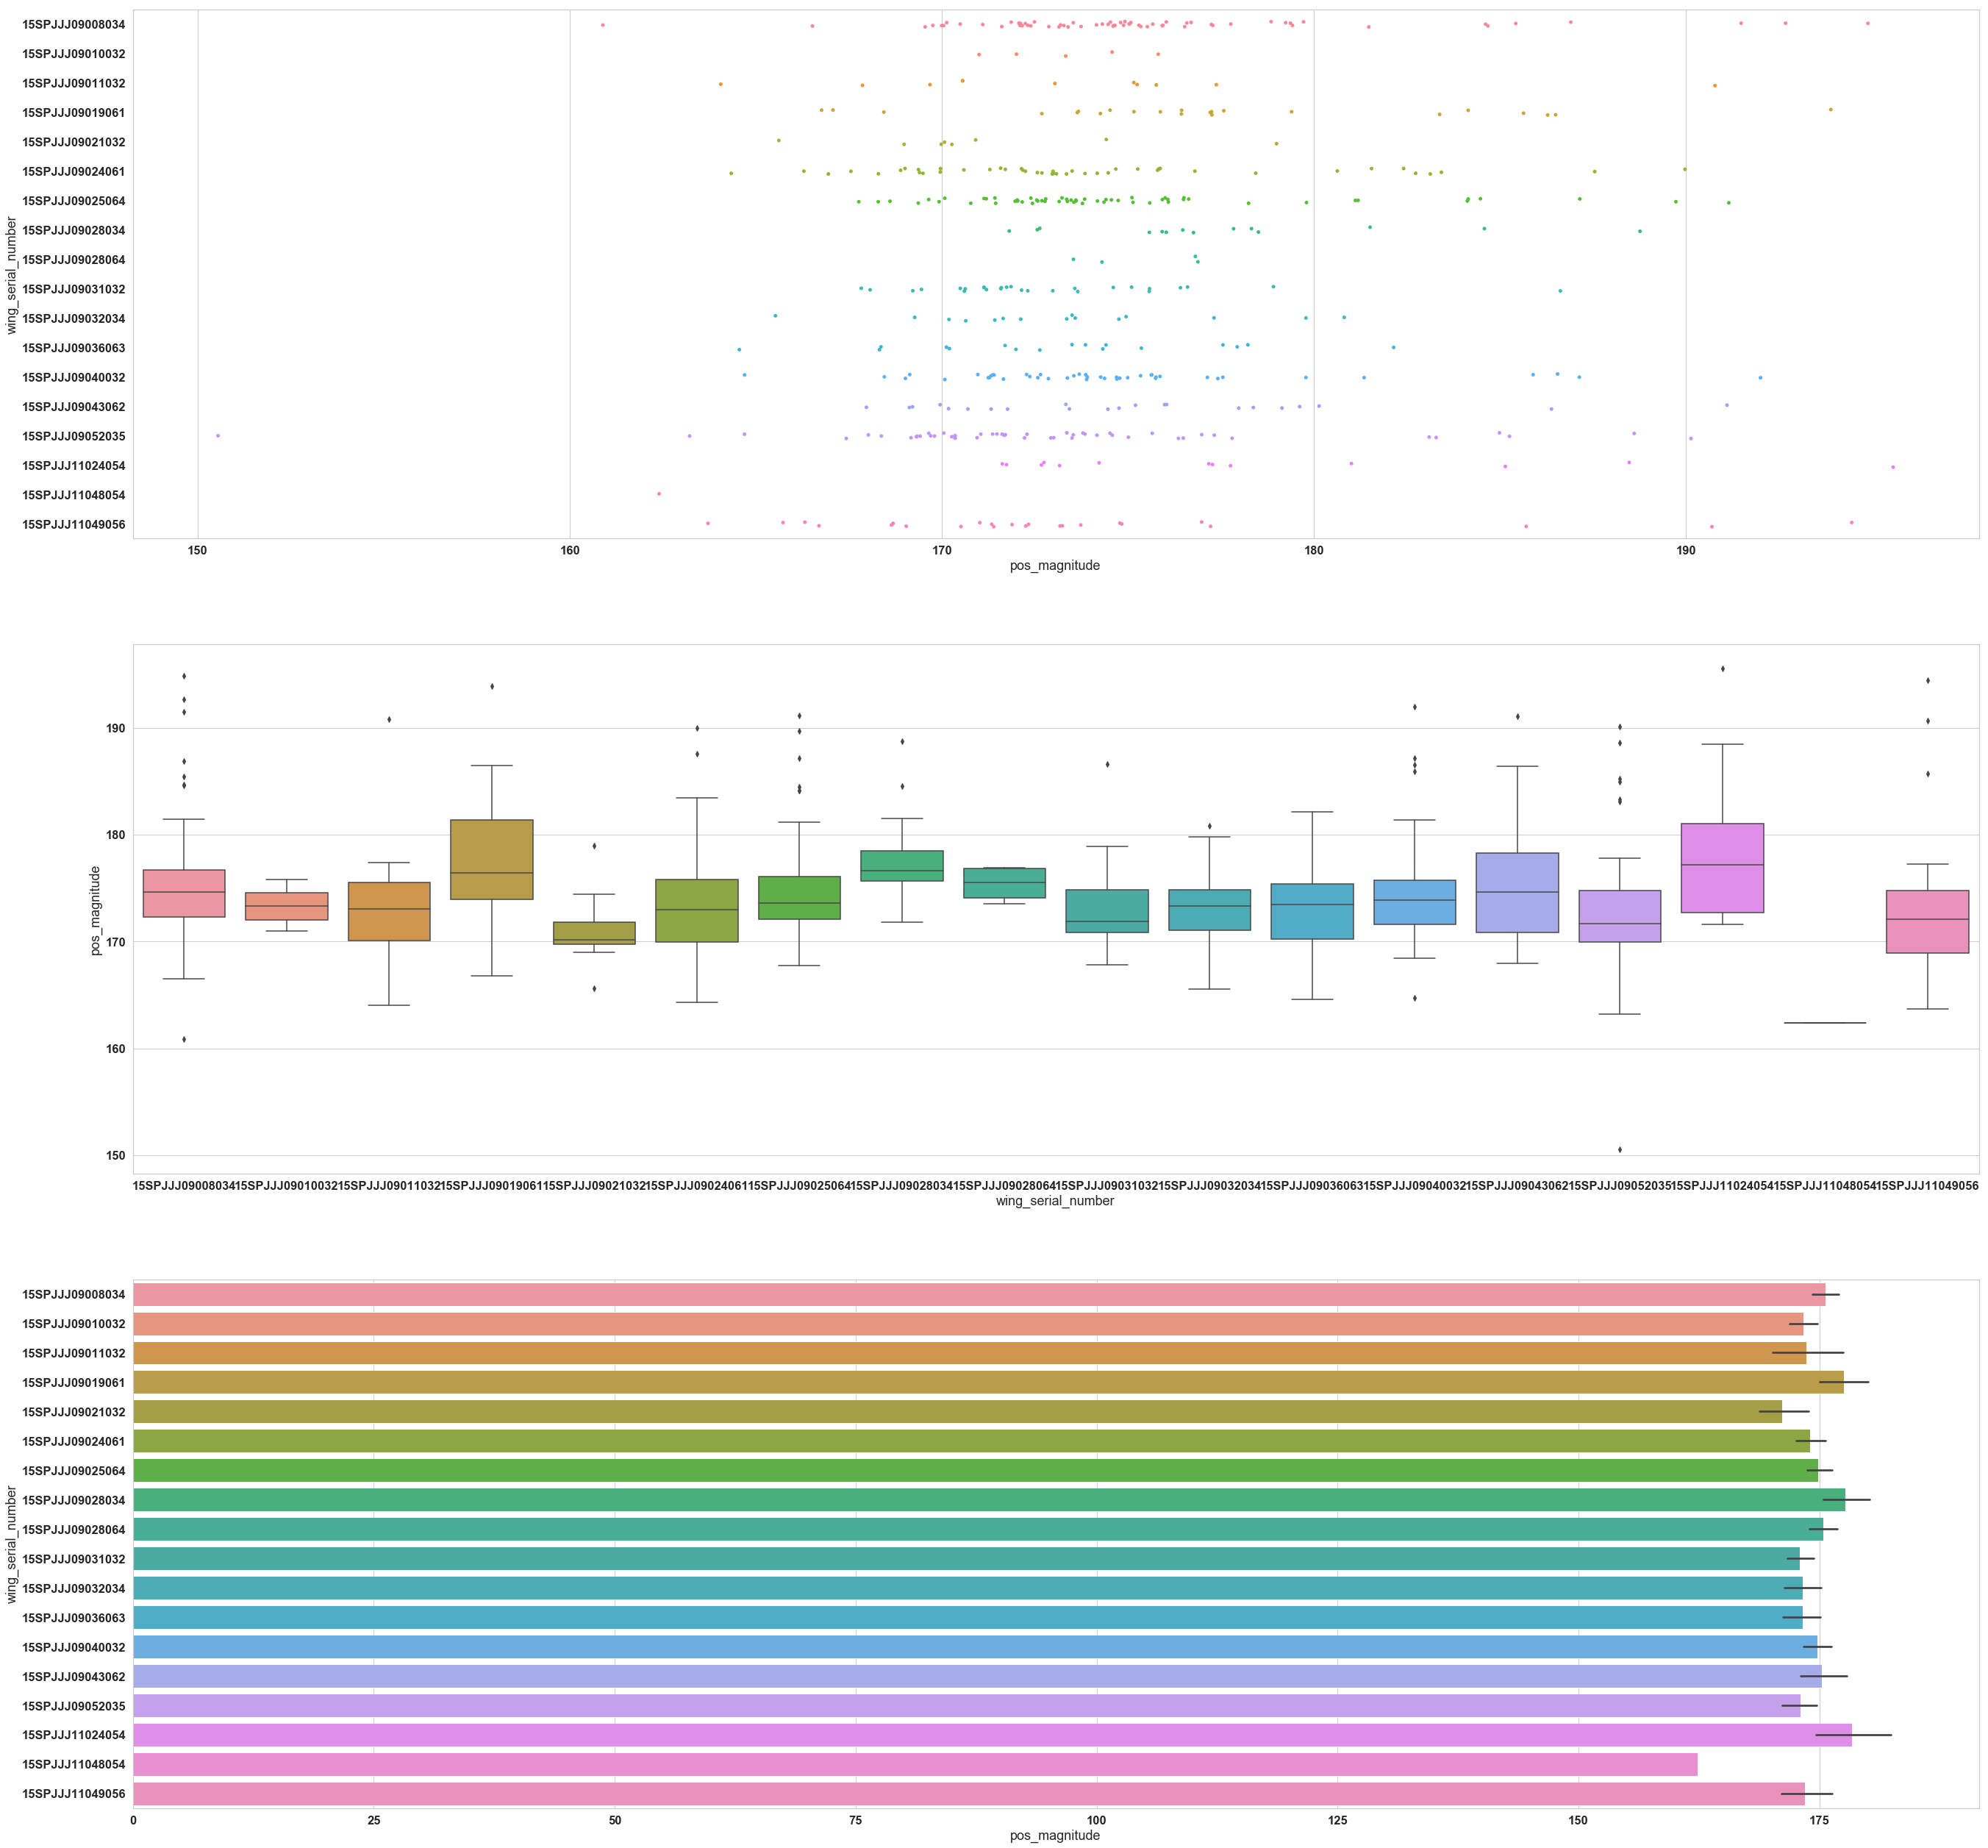

In [526]:
mean_attribute("wing_serial_number","pos_magnitude",data_sum)

**Inferences**

- Most Launches data are from September month
- 15SPJJJ09019061 wing serial number shows a better speed capability and also high distance range
- 15SPJJJ11048054 show poor performance in terms of both speed and distance capabilities
- No significant information regarding wing selection with respect to its variation with air temperature scatter plot


<Figure size 1080x720 with 0 Axes>

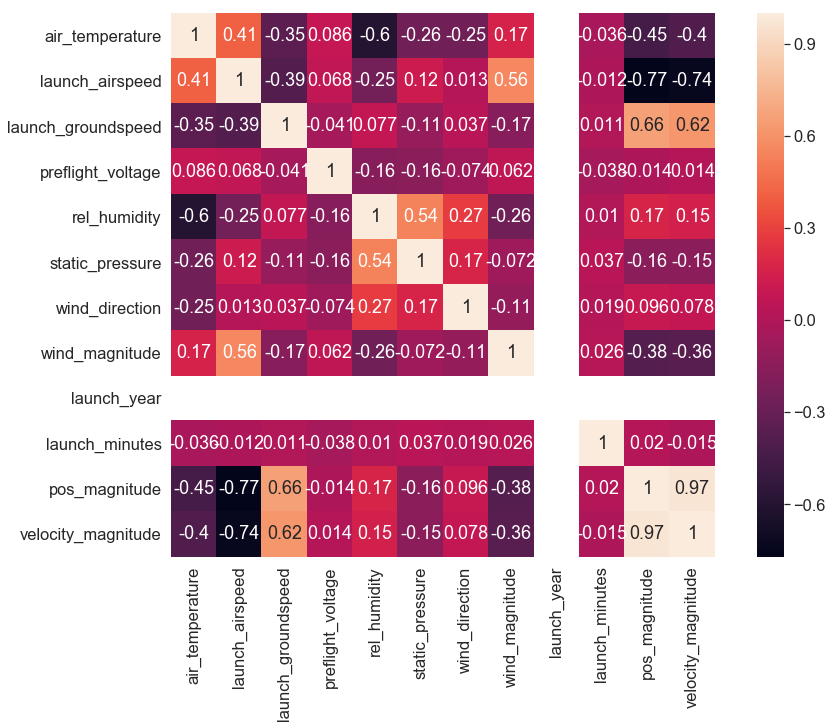

In [365]:
# heat map previously drawn can also be rendered like this in full square 
plt.figure(figsize=(15,10)) #manage the size of the plot
sns.heatmap(data_sum.corr(),annot=True, square = True) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C6B50E6F28>,
      dtype=object)

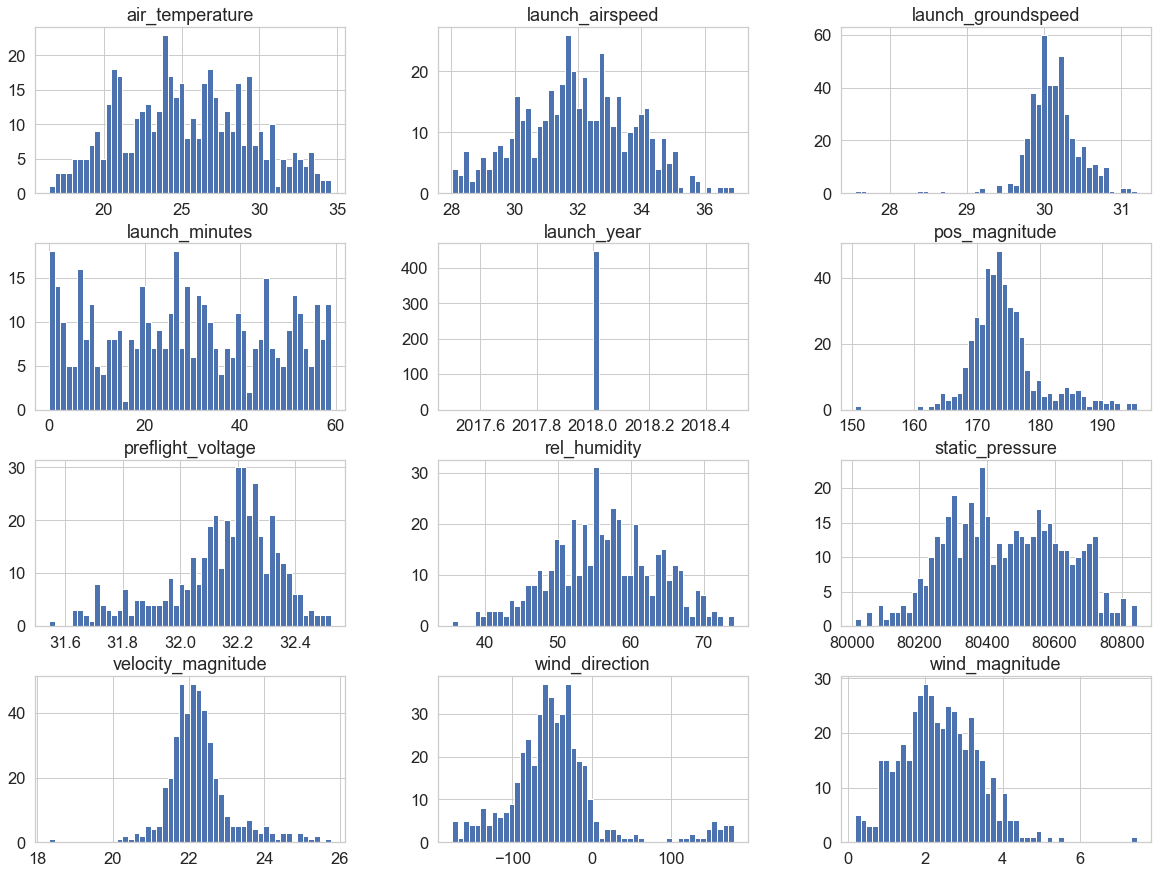

In [366]:
%matplotlib inline

data_sum.hist(bins= 50, figsize=(20,15))
plt.show()

In [527]:
from bokeh.core.properties import Any, Dict, Instance, String
from bokeh.models import ColumnDataSource, LayoutDOM

<Figure size 1800x1800 with 0 Axes>

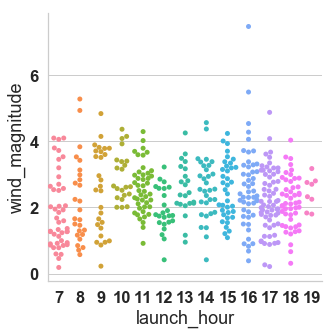

In [529]:
#Plot to understand Wind speed vs Dat Time
fig = plt.figure(figsize=(25, 25))
sns.catplot(x="launch_hour",y="wind_magnitude", kind="swarm",data=data_sum)

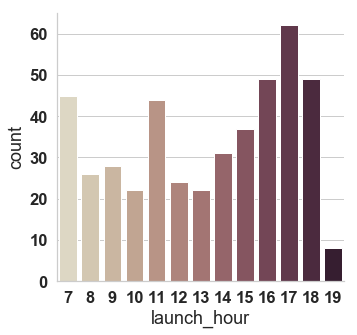

In [530]:
#Plot to understand maximum launch times
sns.catplot(x="launch_hour",kind="count", palette="ch:.35",data=data_sum)

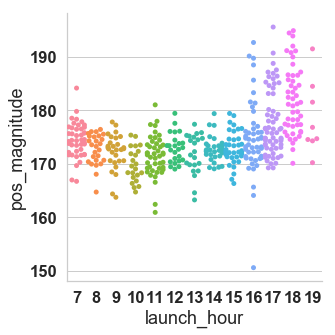

In [531]:
#Plot to understand maximum distance covered with respect of day time
sns.catplot(x="launch_hour",y="pos_magnitude", kind="swarm",data=data_sum)

**Inferences**

- Maximum Launches observed in the evening
- Wind Magnitude observed to be increased in evening
- Distance covered high in the evening which is in conjunction with air temperature
- Histogram plots shows spread and pattern of spread of data points



<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Distance in meters')

Text(0.5, 0, 'Velocity Magnitude')

Text(0.5, 0, 'Launch_hour')

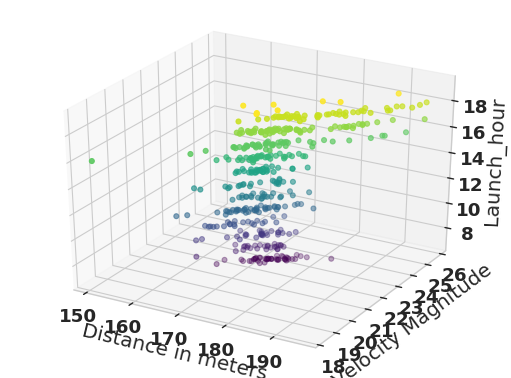

<Figure size 2880x2880 with 0 Axes>

In [407]:
#3D Plots
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data_sum["launch_hour"]
xdata = data_sum["pos_magnitude"]
ydata = data_sum["velocity_magnitude"]
ax.set_xlabel('Distance in meters')
ax.set_ylabel('Velocity Magnitude')
ax.set_zlabel('Launch_hour')
fig = plt.figure(figsize=(40, 40))
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Distance in meters')

Text(0.5, 0, 'Wind Magnitude')

Text(0.5, 0, 'Launch_hour')

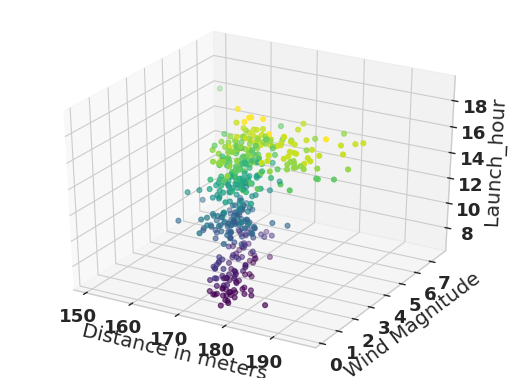

<Figure size 2880x2880 with 0 Axes>

In [409]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data_sum["launch_hour"]
xdata = data_sum["pos_magnitude"]
ydata = data_sum["wind_magnitude"]
ax.set_xlabel('Distance in meters')
ax.set_ylabel('Wind Magnitude')
ax.set_zlabel('Launch_hour')
fig = plt.figure(figsize=(40, 40))
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Distance in meters')

Text(0.5, 0, 'Relative Humidity')

Text(0.5, 0, 'Launch_hour')

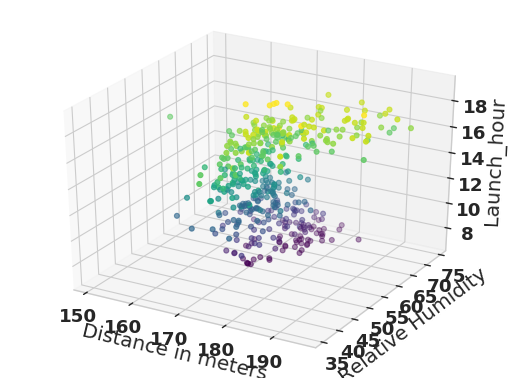

<Figure size 2880x2880 with 0 Axes>

In [413]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data_sum["launch_hour"]
xdata = data_sum["pos_magnitude"]
ydata = data_sum["rel_humidity"]
ax.set_xlabel('Distance in meters')
ax.set_ylabel('Relative Humidity')
ax.set_zlabel('Launch_hour')
fig = plt.figure(figsize=(40, 40))
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Distance in meters')

Text(0.5, 0, 'Pre flight voltage')

Text(0.5, 0, 'Launch_hour')

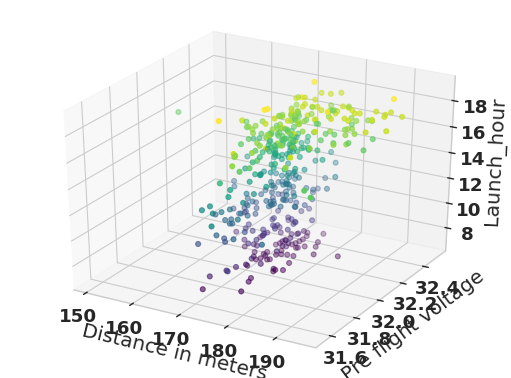

<Figure size 2880x2880 with 0 Axes>

In [412]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data_sum["launch_hour"]
xdata = data_sum["pos_magnitude"]
ydata = data_sum["preflight_voltage"]
ax.set_xlabel('Distance in meters')
ax.set_ylabel('Pre flight voltage')
ax.set_zlabel('Launch_hour')
fig = plt.figure(figsize=(40, 40))
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Relative humidity')

Text(0.5, 0, 'Pre flight voltage')

Text(0.5, 0, 'Launch_hour')

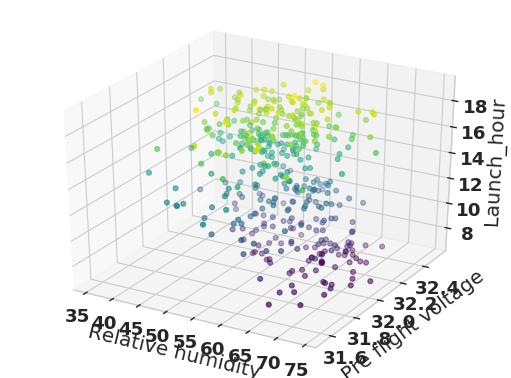

<Figure size 2880x2880 with 0 Axes>

In [416]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data_sum["launch_hour"]
xdata = data_sum["rel_humidity"]
ydata = data_sum["preflight_voltage"]
ax.set_xlabel('Relative humidity')
ax.set_ylabel('Pre flight voltage')
ax.set_zlabel('Launch_hour')
fig = plt.figure(figsize=(40, 40))
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Relative humidity')

Text(0.5, 0, 'Pre flight voltage')

Text(0.5, 0, 'Distance magnitude')

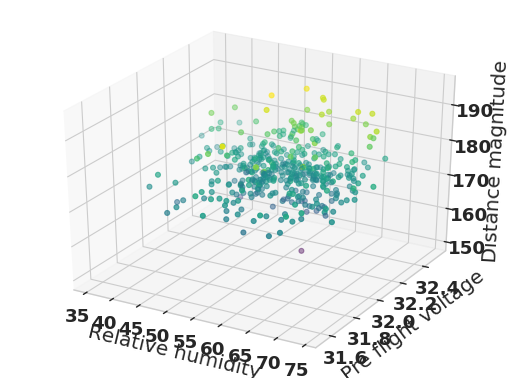

<Figure size 2880x2880 with 0 Axes>

In [417]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data_sum["pos_magnitude"]
xdata = data_sum["rel_humidity"]
ydata = data_sum["preflight_voltage"]
ax.set_xlabel('Relative humidity')
ax.set_ylabel('Pre flight voltage')
ax.set_zlabel('Distance magnitude')
fig = plt.figure(figsize=(40, 40))
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

**Inferences** 

- Velocity Increase observed during evening hours and morning hours of operation
- Wind magnitude affects distance travelled
- Relative humidity has a bell curve distribution which varies as per time
- No specific distribution with respect to pre flight voltage


In [532]:
#Importing Libraries for Model Building - Neural Networks
import AdvancedAnalytics
from AdvancedAnalytics import NeuralNetwork
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math

In [533]:
data_sum.dtypes

flight_id                      category
air_temperature                 float64
battery_serial_number          category
body_serial_number             category
commit                           object
launch_airspeed                 float64
launch_groundspeed              float64
launch_timestamp         datetime64[ns]
preflight_voltage               float64
rel_humidity                    float64
static_pressure                 float64
wind_direction                  float64
wind_magnitude                  float64
wing_serial_number             category
launch_year                       int64
launch_month                   category
launch_day                     category
launch_weekofyear              category
launch_dayofweek                 object
launch_date                      object
launch_time                      object
launch_hour                    category
launch_minutes                    int64
pos_magnitude                   float64
velocity_magnitude              float64


In [534]:
varlist = ['pos_magnitude']
dropvarlist=['flight_id','preflight_voltage','body_serial_number','launch_timestamp','commit','wing_serial_number','launch_year','launch_day','launch_dayofweek','launch_date','launch_time','launch_minutes','battery_serial_number','pos_magnitude','velocity_magnitude','launch_airspeed','launch_groundspeed']
X = data_sum.drop(dropvarlist, axis=1)
y = data_sum[varlist]
np_y = np.ravel(y)

**Model Summary** 

- 10 fold CV 
- Neural Networks used:  [(3), (4), (5), (3,2), (4,3), (5,4), (6,5)]
- Activation: RELU
- Solver: lbfgs
- Best result observed for neurons=3
- Test Data set prediction with average 62.08% observed
- Features Excluded : 'flight_id','preflight_voltage','body_serial_number','launch_timestamp','commit','wing_serial_number','launch_year','launch_day','launch_dayofweek','launch_date','launch_time','launch_minutes','battery_serial_number','pos_magnitude','velocity_magnitude','launch_airspeed','launch_groundspeed'


In [535]:
# Cross-Validation
network_list = [(3), (4), (5), (3,2), (4,3), (5,4), (6,5)]
# Scoring for Interval Prediction Neural Networks
score_list = ['neg_mean_squared_error', 'neg_mean_absolute_error']
score_names = ['ASE', 'MAD']
for nn in network_list:
    print("\nNetwork: ", nn)
    fnn = MLPRegressor(hidden_layer_sizes=nn, activation='relu', alpha=0.0, solver='lbfgs', max_iter=5000, random_state=12345)
    mean_score = [ ]
    std_score = [ ]
    for i in range(len(score_list)):
        scores = cross_val_score(fnn,X,np_y,scoring=score_list[i],cv=10)
        mean_score.append(scores.mean())
        std_score.append (scores.std())
    print("{:.<10s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    for i in range(2):
        mean = math.fabs(mean_score[i])
        std = std_score[i]
        print("{:.<10s}{:>6.4f}{:>13.4f}".format(score_names[i],mean,std))


Network:  3
Metric....  Mean    Std. Dev.
ASE.......15.0844       5.9902
MAD.......2.9375       0.4940

Network:  4
Metric....  Mean    Std. Dev.
ASE.......23.2583       8.1623
MAD.......3.6864       0.6089

Network:  5
Metric....  Mean    Std. Dev.
ASE.......25.4170      13.7887
MAD.......3.7277       0.8525

Network:  (3, 2)
Metric....  Mean    Std. Dev.
ASE.......33.3018      13.6802
MAD.......4.1131       0.8290

Network:  (4, 3)
Metric....  Mean    Std. Dev.
ASE.......23.9100      10.6869
MAD.......3.6641       0.8586

Network:  (5, 4)
Metric....  Mean    Std. Dev.
ASE.......25.4523      11.8551
MAD.......3.7206       0.7930

Network:  (6, 5)
Metric....  Mean    Std. Dev.
ASE.......26.5943       9.0980
MAD.......3.7818       0.6305


In [536]:
X_train, X_validate, y_train, y_validate = train_test_split(X,np_y,test_size = 0.3, random_state=12345)
fnn = MLPRegressor(hidden_layer_sizes=(3), activation='relu', alpha=0.0, solver='lbfgs', max_iter=5000, random_state=12345)
fnn = fnn.fit(X_train,y_train)
NeuralNetwork.display_split_metrics(fnn, X_train, y_train, X_validate, y_validate)



Model Metrics..........       Training     Validation
Observations...........            312            135
Features...............              8              8
Number of Layers.......              1              1
Number of Neurons......              3              3
Number of Outputs......              1              1
Number of Weights......             31             31
Number of Iterations...           1370           1370
Activation Function....           relu           relu
Loss...................         6.5811
R-Squared..............         0.6004         0.6208
Mean Absolute Error....         2.6673         2.6618
Median Absolute Error..         2.0357         2.2555
Avg Squared Error......        13.1623        12.1387
Square Root ASE........         3.6280         3.4841


# From visualizing some of the attributes in our data we can conclude the following:

- Flights that travel in colder temperatures seem to be capable of traveling farther (180m +)
- The flight condition for long flight distances (183.4 meters) happens when temperature is between 16.5 to 28.0 Celsius. The flight condition for flight distance less than 163.49 meters happens when temperature is between 25.8 to 34.6 Celsius
- 15SPJJJ09019061 wing serial number shows a better speed capability and also high distance range, 15SPJJJ11048054 show poor performance in terms of both speed and distance capabilities
- Slight, negative correlations between: wind speed & travel distance and Air-temperature and distance
- Initial ground speed strongly correlates with distance and speed during the flight
- There is little variation in distance/velocity across the drones
- Prediction of Distance which can be covered with R2 of 62.08%.

- **More focus is to be put on high performing wings along with technology – research to control distance loss due to temperature rise is required. This will result in increase of efficiency.**